<a href="https://colab.research.google.com/github/maneeshsagar/anlaysisImbalance/blob/main/ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This program is to develop a neural Network(ANN) regression model . redshift the label/target
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import  MinMaxScaler

import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/train_all_range.csv")

In [3]:
dataset.shape

(604935, 28)

In [4]:
dataset.duplicated().sum()

8604

In [5]:
dataset.drop_duplicates()

,objid,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,zerr,mmug,mmgr,mmri,mmiz,mfug,mfgr,mfri,mfiz,redshift
0,1.240000e+18,22.70128,21.55564,20.74338,19.97239,19.65203,23.26064,22.38317,21.52284,20.75258,...,0.000121,22.128460,21.149510,20.357885,19.812210,22.821905,21.953005,21.137710,20.602890,0.679974
1,1.240000e+18,23.23910,21.44343,19.67306,18.94400,18.55688,23.69614,22.34922,20.59603,19.86871,...,0.000114,22.341265,20.558245,19.308530,18.750440,23.022680,21.472625,20.232370,19.659590,0.412071
2,1.240000e+18,24.05348,21.24721,19.39289,18.68024,18.31429,24.11929,22.13657,20.29977,19.57731,...,0.000068,22.650345,20.320050,19.036565,18.497265,23.127930,21.218170,19.938540,19.384555,0.413140
3,1.240000e+18,26.32478,20.74059,18.99681,18.29084,17.80812,25.19303,21.98622,20.28767,19.56692,...,0.000078,23.532685,19.868700,18.643825,18.049480,23.589625,21.136945,19.927295,19.318555,0.399193
4,1.240000e+18,24.76801,19.32076,17.81846,17.23835,16.92202,24.11602,20.81318,19.32606,18.72738,...,0.000034,22.044385,18.569610,17.528405,17.080185,22.464600,20.069620,19.026720,18.568060,0.253831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604930,1.240000e+18,23.95901,21.45168,20.99064,20.83455,20.90097,24.58145,21.84688,21.45192,21.29986,...,0.008792,22.705345,21.221160,20.912595,20.867760,23.214165,21.649400,21.375890,21.362660,6.911286
604931,1.240000e+18,26.08886,22.08654,21.42736,21.39464,21.62726,25.44403,22.58780,21.98829,21.84853,...,0.001358,24.087700,21.756950,21.411000,21.510950,24.015915,22.288045,21.918410,21.963385,5.464636
604932,1.240000e+18,24.30561,23.59575,21.74487,20.60606,19.91005,24.03291,24.07756,22.41889,21.23574,...,0.001004,23.950680,22.670310,21.175465,20.258055,24.055235,23.248225,21.827315,20.866255,5.350088
604933,1.240000e+18,25.70489,22.18283,21.30940,20.22876,19.21709,23.99918,23.17838,22.30052,21.11168,...,0.000015,23.943860,21.746115,20.769080,19.722925,23.588780,22.739450,21.706100,20.624625,6.964785


In [6]:
#these columns are not required
dataset.drop(['objid'], axis = 1,inplace=True) #dropping objid column
dataset.drop(['zerr'], axis = 1,inplace=True) #dropping zerr column

In [7]:
dataset[dataset["modelMag_u"]==-9999]=np.nan
dataset[dataset["modelMag_g"]==-9999]=np.nan
dataset[dataset["modelMag_r"]==-9999]=np.nan
dataset[dataset["modelMag_i"]==-9999]=np.nan
dataset[dataset["modelMag_z"]==-9999]=np.nan
dataset[dataset["fiberMag_u"]==-9999]=np.nan
dataset[dataset["fiberMag_g"]==-9999]=np.nan
dataset[dataset["fiberMag_r"]==-9999]=np.nan
dataset[dataset["fiberMag_i"]==-9999]=np.nan
dataset[dataset["fiberMag_z"]==-9999]=np.nan
dataset[dataset["petroR50_r"]==-9999]=np.nan
dataset[dataset["petroR90_r"]==-9999]=np.nan
dataset[dataset["petroR50_z"]==-9999]=np.nan
dataset[dataset["petroR90_z"]==-9999]=np.nan
dataset[dataset["mmug"]==-9999]=np.nan
dataset[dataset["mmgr"]==-9999]=np.nan
dataset[dataset["mmri"]==-9999]=np.nan
dataset[dataset["mmiz"]==-9999]=np.nan
dataset[dataset["mfug"]==-9999]=np.nan
dataset[dataset["mfgr"]==-9999]=np.nan
dataset[dataset["mfri"]==-9999]=np.nan
dataset[dataset["mfiz"]==-9999]=np.nan
dataset[dataset["r"]==-9999]=np.nan
dataset[dataset["i"]==-9999]=np.nan
dataset[dataset["z"]==-9999]=np.nan
dataset[dataset["redshift"]==-9999]=np.nan
dataset[dataset["redshift"]<0]=np.nan

In [8]:
#Dropping null values
dataset=dataset.dropna()
dataset.shape

(592312, 26)

Text(0, 0.5, 'Number of samples')

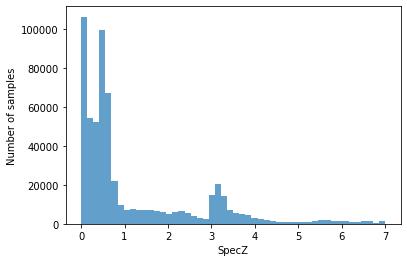

In [9]:
#checking the data distribution
plt.hist(dataset['redshift'], bins=50, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [10]:
def getClass(value):
  if value>=0.00 and value<1.0:
    return '1'
  elif value>=1.00 and value<2.0:
    return '2'
  elif value>=2.00 and value<3.0:
    return '3'
  elif value>=3.00 and value<4.0:
    return '4'
  elif value>=4.00 and value<5.0:
    return '5'
  elif value>=5.00 and value<6.0:
    return '6'
  elif value>=6.00 and value<=7.0:
    return '7'

In [11]:
##dataset['Class']=dataset['redshift'].apply(lambda x: cls(x))
#dataset['Class']=dataset['redshift'].apply(lambda x: 0 if x<1.0 else 1)
dataset['Class']=dataset['redshift'].apply(lambda x: getClass(x))
dataset=dataset.dropna()
dataset.shape
#dataset.loc[dataset['redshift'] >0.00 , 'Class']='A'

(592312, 27)

In [12]:
df_1=dataset[dataset.Class=='1']
df_2=dataset[dataset.Class=='2']
df_3=dataset[dataset.Class=='3']
df_4=dataset[dataset.Class=='4']
df_5=dataset[dataset.Class=='5']
df_6=dataset[dataset.Class=='6']
df_7=dataset[dataset.Class=='7']

In [13]:
from sklearn.utils import resample
df_1=resample(df_1,replace=True,n_samples=5000,random_state=123) 
df_2=resample(df_2,replace=True,n_samples=5000,random_state=123) 
df_3=resample(df_3,replace=True,n_samples=4272,random_state=123) 
df_4=resample(df_4,replace=True,n_samples=1933,random_state=123) 
df_5=resample(df_5,replace=True,n_samples=1725,random_state=123) 
df_6=resample(df_6,replace=True,n_samples=1799,random_state=123) 
df_7=resample(df_7,replace=True,n_samples=1688,random_state=123) 
 

In [14]:
dataset=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7])

In [15]:
del dataset['Class']

In [16]:
dataset.shape

(21417, 26)

In [17]:
#dataset['redshift']=np.log1p(dataset['redshift'])

Text(0, 0.5, 'Number of samples')

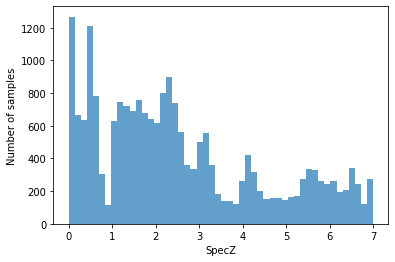

In [18]:
#checking the data distribution
plt.hist(dataset['redshift'], bins=50, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [19]:
X=dataset.drop('redshift',axis=1)
Y=dataset['redshift']

In [20]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)
X.shape

[[0.54466511 0.50488961 0.62233948 ... 0.61911443 0.57650437 0.52158608]
 [0.51007011 0.59149041 0.7438489  ... 0.73694822 0.67972183 0.61469536]
 [0.2336106  0.2647087  0.4157585  ... 0.37455848 0.42364118 0.43238607]
 ...
 [0.4830018  0.54283573 0.75110958 ... 0.71704978 0.69849022 0.61266916]
 [0.53310083 0.62953367 0.85228429 ... 0.81217346 0.86041169 0.80323836]
 [0.52452411 0.5596525  0.83215634 ... 0.67017816 0.74145609 0.76515335]]


(21417, 25)

In [21]:
# Target vector
y = dataset['redshift']
print(y)

298740    0.233937
333195    0.584184
33228     0.017118
20818     0.606055
230252    0.608283
            ...   
591195    6.992447
593709    6.823400
604276    6.249744
585923    6.453612
594722    6.128631
Name: redshift, Length: 21417, dtype: float64


In [22]:
y=y.to_numpy() #pd needs to convert to numpy before applying minmaxscaler
y=y.reshape(-1,1) # this is for using MinMAxscalerr
print(y.shape)

(21417, 1)


In [23]:
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
print(y)

[[0.03342002]
 [0.08345604]
 [0.00244552]
 ...
 [0.89283333]
 [0.92195774]
 [0.87553122]]


In [24]:
#user dfined function for train,test and validation
def my_train_test_split(X, y, ratio_train, ratio_val, seed=42):
    idx = np.arange(X.shape[0])
    np.random.seed(seed)
    np.random.shuffle(idx)

    limit_train = int(ratio_train * X.shape[0])
    limit_val = int((ratio_train + ratio_val) * X.shape[0])

    idx_train = idx[:limit_train]
    idx_val = idx[limit_train:limit_val]
    idx_test = idx[limit_val:]

    X_train, y_train = X[idx_train], y[idx_train]
    X_val, y_val = X[idx_val], y[idx_val]
    X_test, y_test = X[idx_test], y[idx_test]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [25]:
X_train, X_val, X_test, y_train, y_val, y_test = my_train_test_split(X, y, .75,.15,seed=42)

In [26]:
print('# Train/Test = %s' %len(pd.merge(pd.DataFrame(X_train), pd.DataFrame(X_test), how='inner')))

# Train/Test = 258


In [27]:
y_train=y_train.ravel()

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.linalg import pinv2
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error

In [29]:
import numpy as np
import time


def _mean_squared_error(y, pred):
    return 0.5 * np.mean((y - pred) ** 2)


def _mean_abs_error(y, pred):
    return np.mean(np.abs(y, pred))


def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def _linear(x):
    return x


def _fourier(x):
    return np.sin(x)


def _hardlimit(x):
    return (x >= 0).astype(int)


def _identity(x):
    return x


def getActivation(name):
    return {
        'sigmoid': _sigmoid,
        'fourier': _fourier,
        'hardlimit': _hardlimit
    }[name]


def getLoss(name):
    return {
        'mse': _mean_squared_error,
        'mae': _mean_abs_error
    }[name]


class ELM:
    def __init__(self, num_input_nodes, num_hidden_units, num_out_units, activation='sigmoid',
                 loss='mse', beta_init=None, w_init=None, bias_init=None):
        self._num_input_nodes = num_input_nodes
        self._num_hidden_units = num_hidden_units
        self._num_out_units = num_out_units

        self._activation = getActivation(activation)
        self._loss = getLoss(loss)

        if isinstance(beta_init, np.ndarray):
            self._beta = beta_init
        else:
            self._beta = np.random.uniform(-1., 1., size=(self._num_hidden_units, self._num_out_units))

        if isinstance(w_init, np.ndarray):
            self._w = w_init
        else:
            self._w = np.random.uniform(-1, 1, size=(self._num_input_nodes, self._num_hidden_units))

        if isinstance(bias_init, np.ndarray):
            self._bias = bias_init
        else:
            self._bias = np.zeros(shape=(self._num_hidden_units,))

        print('Bias shape:', self._bias.shape)
        print('W shape:', self._w.shape)
        print('Beta shape:', self._beta.shape)

    def fit(self, X, Y, display_time=False):
        H = self._activation(X.dot(self._w) + self._bias)

        # Moore–Penrose pseudo inverse
        if display_time:
            start = time.time()
        H_pinv = np.linalg.pinv(H)
        if display_time:
            stop = time.time()
            print(f'Train time: {stop-start}')

        self._beta = H_pinv.dot(Y)

        # print('Fit Beta shape:', self._beta.shape)

    def __call__(self, X):
        H = self._activation(X.dot(self._w) + self._bias)
        return H.dot(self._beta)

    def _mean_squared_error(y, pred):
        return 0.5 * np.mean((y - pred) ** 2)

    def evaluate(self, X, y_test):
        pred = self(X)

        # Loss (base on model setting)
        #loss = self._loss(y_test, pred)
        #loss=_mean_squared_error(y_test,pred)
        #var = metrics.explained_variance_score(y_test, pred)
        #mae = metrics.mean_absolute_error(y_test, pred)
       # mse = metrics.mean_squared_error(y_test, pred)
       # r2 = metrics.r2_score(y_test, pred)
       # rmse = sqrt(mean_squared_error(y_test, pred))
  
       # y_test=pd.DataFrame(y_test)
       # pred=pd.DataFrame(pred)
       # outl=pred[abs(y_test-pred)>0.1]
       # outl=outl.dropna()
       # out=outl.shape[0]*100.0/y_test.shape[0]
       # rms=np.sqrt(np.mean((y_test-pred)**2))
       # rmsout=np.sqrt(np.mean(((y_test-pred)[abs(y_test-pred)<0.1])**2))
       # bias=np.mean(y_test-pred)
      #  biasmedian=np.median(y_test-pred)
      #  delta_znorm=abs((y_test-pred)-np.median(pred-y_test)/(1+y_test))
      #  NMAD=1.48*np.median(delta_znorm)
        # Accuracy
       # acc = np.sum(np.argmax(pred, axis=-1) == np.argmax(Y, axis=-1)) / len(Y)

        # Unweighted Average Recall
        # TODO

        return pred

In [30]:
num_hidden_layers=512
num_classes=1
model = ELM(
      25,
      num_hidden_layers,
      num_classes,
      w_init=25
  )
   

Bias shape: (512,)
W shape: (25, 512)
Beta shape: (512, 1)


In [31]:
model.fit(X_train, y_train)


In [32]:
y_pred_tree= model.evaluate(X_test, y_test)
#print('val loss: %f' % val_loss)

In [33]:
#print("MSE",mse)
#print("MAE",mae)
#print("OUTL",outl)
#print("R2",r2)
#print("NMAD",nmad)

In [34]:
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.32750606186915465
Mean Absolute Error (best is 0.0): 0.1606378710829346
Mean Squared Error (best is 0.0): 0.052750248377111966
R2 score (best is 1.0): 0.32748163019779186
root Mean Squared Error (best is 0.0): 0.2296742222738807


In [35]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  49.906629318394025 %
Total rms:  0    0.229674
dtype: float64
rms w/o outliers 0    0.046574
dtype: float64
Bias:  0    0.001384
dtype: float64
Bias(median value of delta z): -0.024054631461778983
NMAD:  0.16230198400228937


Text(0, 0.5, 'Predicted')

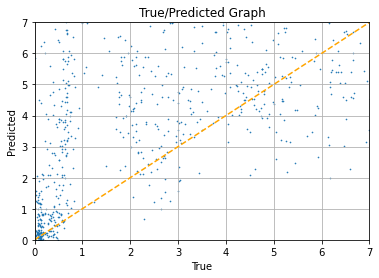

In [36]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:359670], y_pred_tree[:359670], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')

In [37]:
#code for xtratree regressor
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor
import timeit
start = timeit.default_timer()
estima=('md',model)
model = ExtraTreesRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
stop = timeit.default_timer()
print('Time: ', (stop - start)/60,'minutes')  


Time:  0.22736703759999982 minutes


In [38]:
y_pred_tree = model.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.48835742616299116
Mean Absolute Error (best is 0.0): 0.12671336160274352
Mean Squared Error (best is 0.0): 0.04022808623471631
R2 score (best is 1.0): 0.4871279698737363
root Mean Squared Error (best is 0.0): 0.20056940503156584


In [39]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  38.98225957049486 %
Total rms:  0    0.200569
dtype: float64
rms w/o outliers 0    0.039154
dtype: float64
Bias:  0   -0.00982
dtype: float64
Bias(median value of delta z): -0.013042173995342722
NMAD:  0.09462091460087127


In [40]:
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(base_estimator=ExtraTreesRegressor(n_estimators=50, random_state=0),n_estimators=10, random_state=0)
regr.fit(X_train, y_train)

BaggingRegressor(base_estimator=ExtraTreesRegressor(n_estimators=50,
                                                    random_state=0),
                 random_state=0)

In [41]:
y_pred_tree = regr.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.4744431333493141
Mean Absolute Error (best is 0.0): 0.13687630059284156
Mean Squared Error (best is 0.0): 0.041267253865309016
R2 score (best is 1.0): 0.4738795143237021
root Mean Squared Error (best is 0.0): 0.2031434317552724


In [42]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  43.790849673202615 %
Total rms:  0    0.203143
dtype: float64
rms w/o outliers 0    0.043902
dtype: float64
Bias:  0   -0.006649
dtype: float64
Bias(median value of delta z): -0.020201776849193123
NMAD:  0.1317046760330733


In [43]:
estimators=[('xtra',ExtraTreesRegressor(n_estimators=100, random_state=0)),('EML',ELM(
      25,
      num_hidden_layers,
      num_classes,
      w_init=25
  ))]

Bias shape: (512,)
W shape: (25, 512)
Beta shape: (512, 1)


In [44]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
reg = StackingRegressor(estimators=estimators,final_estimator=ExtraTreesRegressor(n_estimators=200, random_state=0))

In [45]:
y_pred_tree = regr.predict(X_test)
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): 0.4744431333493141
Mean Absolute Error (best is 0.0): 0.13687630059284156
Mean Squared Error (best is 0.0): 0.041267253865309016
R2 score (best is 1.0): 0.4738795143237021
root Mean Squared Error (best is 0.0): 0.2031434317552724


In [46]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  43.790849673202615 %
Total rms:  0    0.203143
dtype: float64
rms w/o outliers 0    0.043902
dtype: float64
Bias:  0   -0.006649
dtype: float64
Bias(median value of delta z): -0.020201776849193123
NMAD:  0.1317046760330733
